# 00. EDA

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

print("Notebook dir: ", os.getcwd())

%matplotlib inline
%load_ext lab_black

Notebook dir:  /Users/tombutler/Documents/kaggle-cc-fraud
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [2]:
train = pd.read_csv("data/train.csv")
train.head(3)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0


### Data context

*Information taken from [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).*

>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## 1. Investigate time features

Plotting the time features by some other feature (e.g., `amount`) could give a nice visual of if there are some time-related patterns in the data.

In [11]:
max_time = train["Time"].max()

print(
    "Train set max time: {:,.2f} hours = {:,.2f} mins = {:,.0f} seconds.".format(
        max_time / 60**2, max_time / 60, max_time
    )
)

Train set max time: 33.49 hours = 2,009.67 mins = 120,580 seconds.


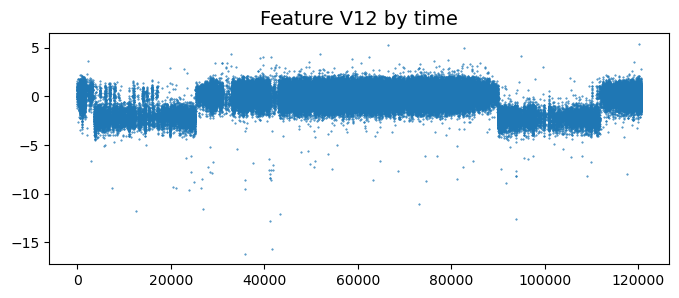

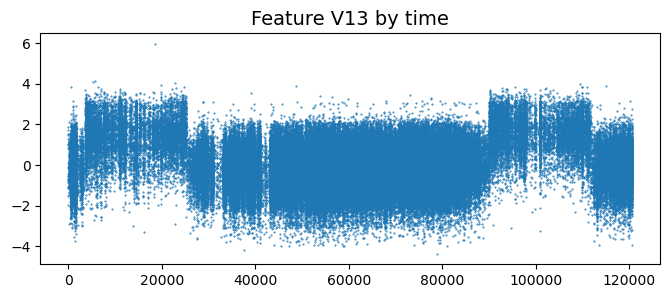

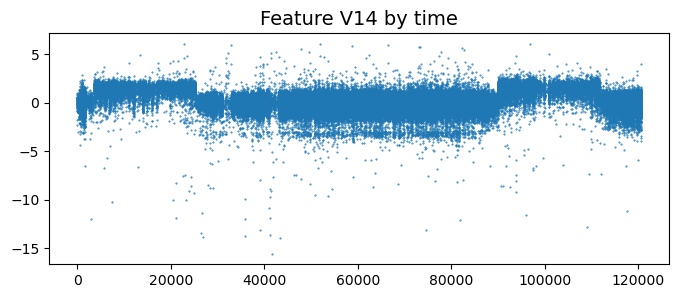

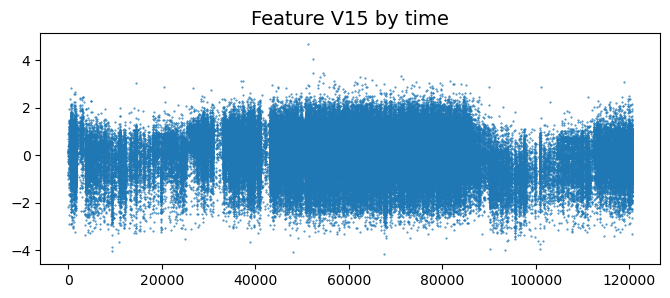

In [25]:
for ft in [f"V{i}" for i in range(12, 16)]:
    plt.figure(figsize=(8, 3))
    plt.title(f"Feature {ft} by time", fontsize=14)
    plt.scatter(x=train["Time"], y=train[ft], s=0.2)
    plt.show()

It seems clear that there is some time dependency in the features plotted above. Depending on where patterns in the time feature are, this could be split up into categories (or just kept as the numerical variable that is is).